In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## EDA

- Binary classification

In [2]:
df = pd.read_csv("titanic/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### No duplicated data

In [8]:
len(df[df.duplicated()])

0

In [9]:
# rename columns
df.rename(columns={
    "PassengerId": "id", 
    "Survived": "target",
    "Pclass":"pclass",
    "Name": "name",
    "Sex": "sex",
    "Age" : "age",
    "SibSp" : "sibsip",
    "Parch": "parch",
    "Ticket":"ticket",
    "Fare":"fare",
    "Cabin" : "cabin",
    "Embarked" : "embarked"
}, inplace=True)

### Analysis of Pclass variable

- No Missing variables
- Categorical variable (Already cleaned)
    - 1 - upper class
    - 2 - Middle clas
    - 3 - lower class

In [10]:
df["pclass"].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [11]:
df["pclass"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: pclass
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [12]:
def catergorical_plot(x_ax, title, x_label,y_label=None):
    plt.figure(figsize=(10,5))
    sns.countplot(df,x=x_ax)
    plt.title(title)
    plt.xlabel(x_label)

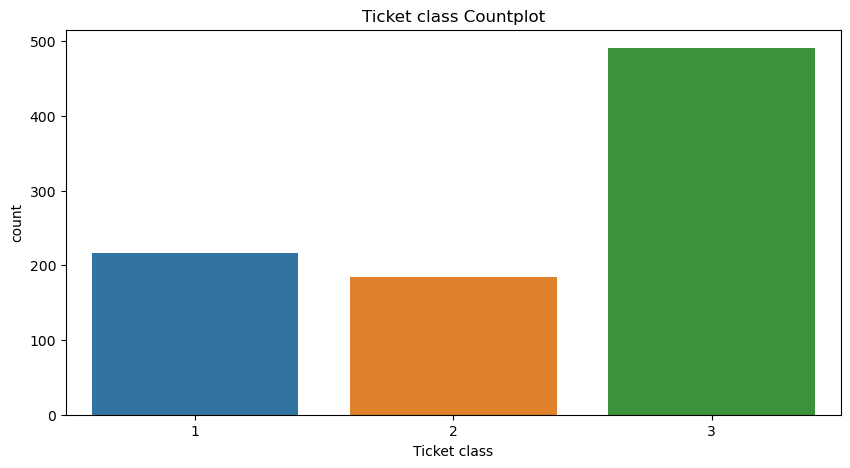

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df,x="pclass")
plt.title("Ticket class Countplot")
plt.xlabel("Ticket class");

## Analysis for Sex variable

- No missing data
- Categorial data
    - One-hot encoding
    

In [14]:
df["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

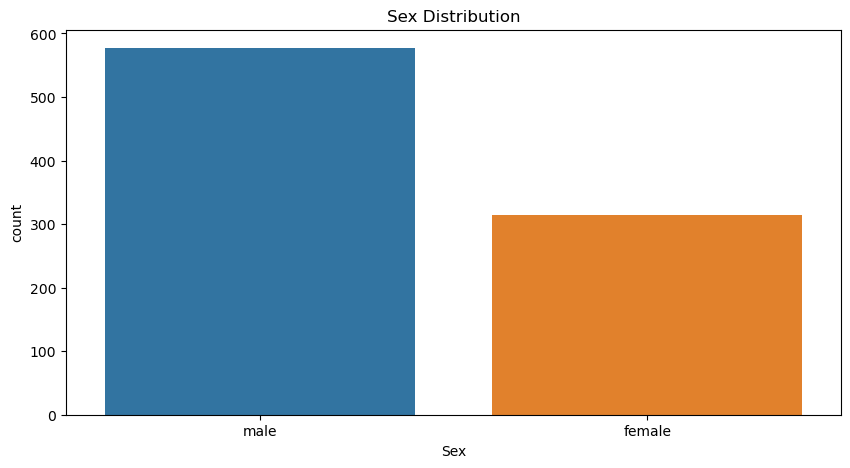

In [15]:
# countplot for sex distibution
catergorical_plot("sex", "Sex Distribution", "Sex")

## Analysis for Age Variable
- Missing values in age, fill with the median age
- Average age is 29, Median 28
- Categorize the data into age group during feature engineering

In [16]:
df["age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [17]:
df["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

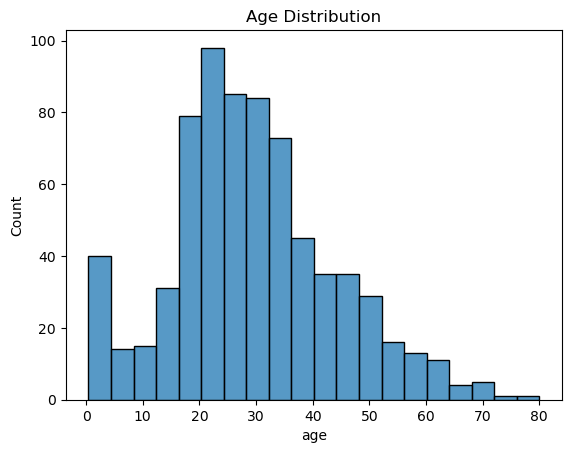

In [18]:
sns.histplot(data=df,x='age')
plt.title('Age Distribution');

In [19]:
# bins = [0, 12, 18, 35, 60, 100]
# labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
# df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [20]:
df.head()

,id,target,pclass,name,sex,age,sibsip,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df[~df["age"].isna()].head()

,id,target,pclass,name,sex,age,sibsip,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analysis for sib/sp (Siblings/Spouse on board)

- Numerical data
- No missing value

In [22]:
df["sibsip"].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsip, dtype: float64

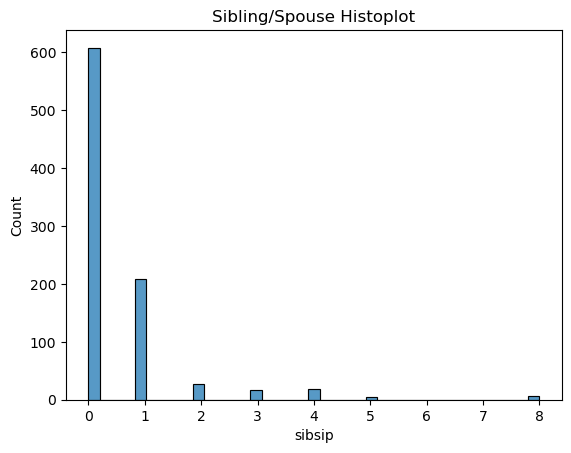

<Figure size 1000x1000 with 0 Axes>

In [23]:
sns.histplot(data=df, x="sibsip")
plt.title("Sibling/Spouse Histoplot")
plt.figure(figsize=(10,10));

## Analysis for No of parents / children aboard the Titanic

- Numerical Data
- No missing data


In [24]:
df["parch"].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: parch, dtype: float64

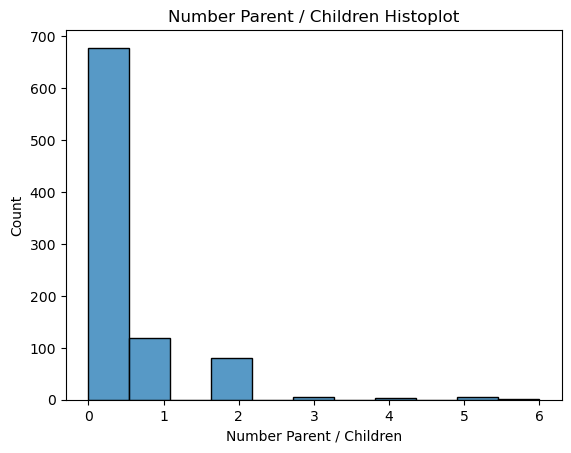

<Figure size 1000x1000 with 0 Axes>

In [25]:
sns.histplot(data=df, x="parch")
plt.title("Number Parent / Children Histoplot")
plt.xlabel("Number Parent / Children")
plt.figure(figsize=(10,10));

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        891 non-null    int64  
 1   target    891 non-null    int64  
 2   pclass    891 non-null    int64  
 3   name      891 non-null    object 
 4   sex       891 non-null    object 
 5   age       714 non-null    float64
 6   sibsip    891 non-null    int64  
 7   parch     891 non-null    int64  
 8   ticket    891 non-null    object 
 9   fare      891 non-null    float64
 10  cabin     204 non-null    object 
 11  embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Ticket Analysis

- object data type
- No missing data
- It seems the Ticket are given based on the family registration

In [27]:
df["ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: ticket, dtype: object

In [28]:
df["ticket"].isna().sum()

0

In [63]:
df["ticket"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: ticket
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [29]:
df["ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: ticket, Length: 681, dtype: int64

## Fare Analysis

- Datatype : float
- No missing values
- present of outlier

In [30]:
df["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [31]:
df["fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

<Figure size 640x480 with 0 Axes>

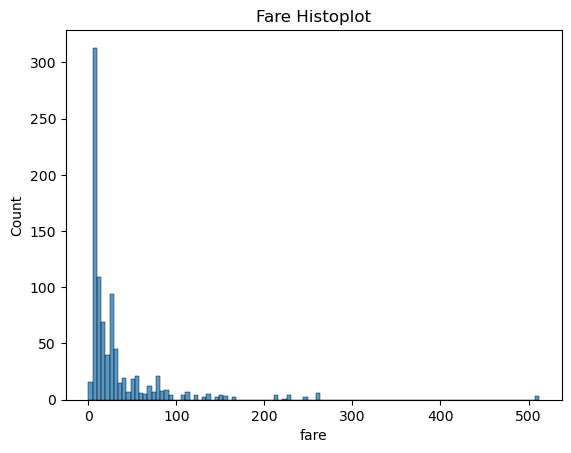

<Figure size 640x480 with 0 Axes>

In [32]:
sns.histplot(df, x="fare")
plt.title("Fare Histoplot")
plt.figure()


## Cabin Analysis

- present of missing values
- 147 unique data
- 687 missing data
- data-type is String
- replace missing values with "missing"
<!-- - Probal -->

In [33]:
df["cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: cabin, Length: 147, dtype: int64

In [34]:
df.cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: cabin, dtype: object

In [35]:
df["cabin"].isna().sum()

687

In [36]:
df[df["pclass"] == 1 & ~df["cabin"].isna()].tail()

,id,target,pclass,name,sex,age,sibsip,parch,ticket,fare,cabin,embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Analysis of Embarked cols

- Categorical data (3 categories)
- Port of Embarkation
- 2 missing inputs
- Probabily fill with it mode

In [37]:
df["embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: object

In [38]:
df["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [39]:
df["embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: embarked, dtype: object

In [40]:
# check for missing values in embarked cols
df["embarked"].isna().sum()

2

In [41]:
df[df["embarked"].isna()]

,id,target,pclass,name,sex,age,sibsip,parch,ticket,fare,cabin,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Text(0.5, 1.0, 'Embarkation CountPlot')

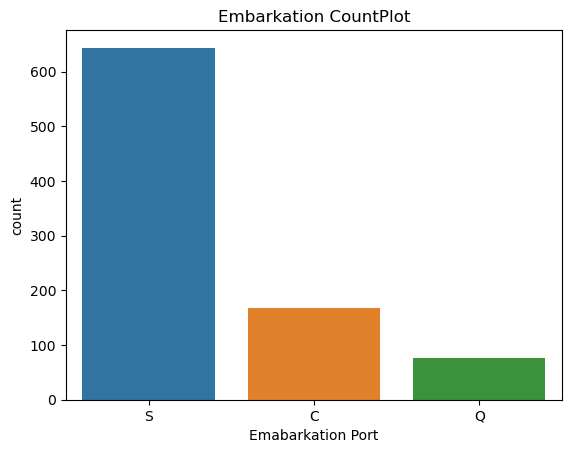

In [42]:
sns.countplot(df, x='embarked')
plt.xlabel("Emabarkation Port")
plt.title("Embarkation CountPlot")

<Axes: xlabel='pclass', ylabel='fare'>

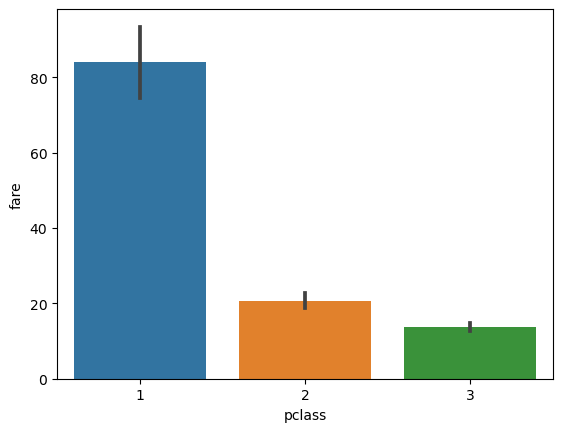

In [43]:
sns.barplot(x="pclass", y="fare", data=df)

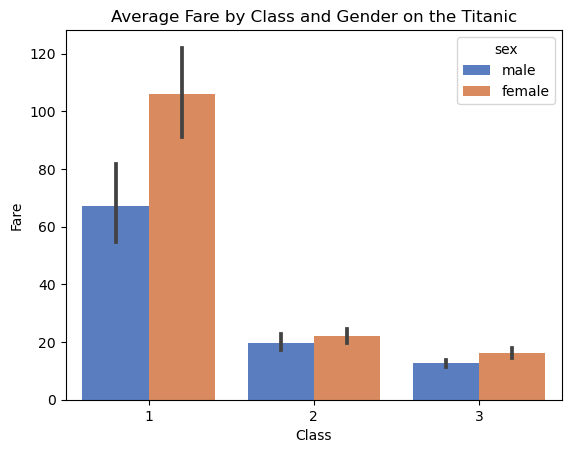

In [44]:
sns.barplot(x="pclass", y="fare", hue="sex", palette="muted", data=df)




# add labels and title

plt.xlabel("Class")

plt.ylabel("Fare")

plt.title("Average Fare by Class and Gender on the Titanic")




# display the plot

plt.show()

# Train-Validation split

### Looking for correlation

In [45]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
fare      0.257307
parch     0.081629
id       -0.005007
sibsip   -0.035322
age      -0.077221
pclass   -0.338481
Name: target, dtype: float64

In [46]:
# spliting data into train and validation data
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(df,random_state=42, test_size=0.2)

In [47]:
titanic =train_data.copy()

In [49]:
titanic.head()

,id,target,pclass,name,sex,age,sibsip,parch,ticket,fare,cabin,embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


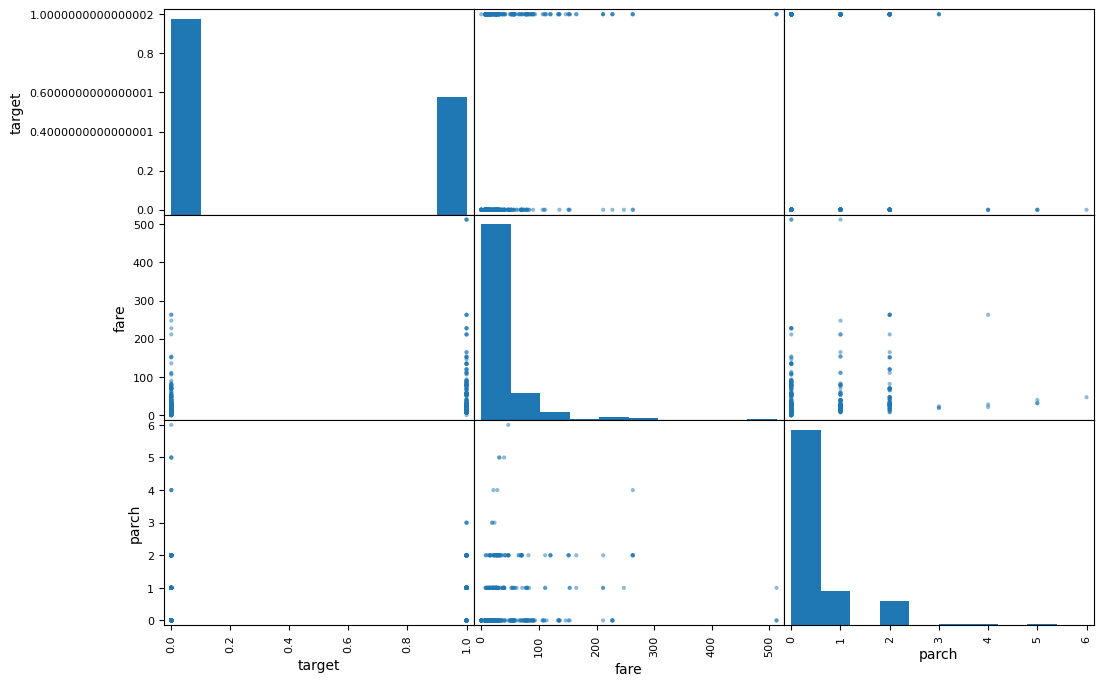

In [57]:
from pandas.plotting import scatter_matrix

attributes = ["target","fare", "parch"]
scatter_matrix(titanic[attributes], figsize=(12,8));

In [52]:
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
fare      0.257307
parch     0.081629
id       -0.005007
sibsip   -0.035322
age      -0.077221
pclass   -0.338481
Name: target, dtype: float64

### Preparing Data For ML

In [59]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer



# imputer for age
age_imputer = SimpleImputer(strategy="median")

# cabin imputer
cabin_imputer = SimpleImputer(strategy="constant", fill_value="missing")



# one-encode sex col
sex_encoder = OneHotEncoder()
 
    

In [ ]:
# change the order of pclass to the reverse

In [61]:

titanic["target"].isna().sum()

0